In [1]:
# 注意pack, 在 Exp02MyLR.ipynb 中本人坚持使用课程上的梯度下降算法原原本本的用代码呈现
# 得到的结果十分差, 一度怀疑模型理论问题, 后来逐渐发现, 原来还要调参, 仅仅这么几个参数就够呛的了
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
data = pd.read_csv("ex2data1.txt", header=None, names=['ExamA', 'ExamB', 'Admitted'])
is_adm = data[data['Admitted']==1]
no_adm = data[data['Admitted']==0]
ax, fig = plt.subplots()
fig.scatter(is_adm.ExamA, is_adm.ExamB)
fig.scatter(no_adm.ExamA, no_adm.ExamB, c='r', marker='x')
plt.show()

In [13]:
# 处理数据
data.insert(0, 'Ones', 1)

In [73]:
d = data.shape[1]
X = np.matrix(data.iloc[:, 0:d-1])
y = np.matrix(data.iloc[:, d-1:d])
theta = np.matrix(np.zeros(d-1))
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [74]:
# sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [87]:
# costFunc
def costFunc(theta, X, y): # 注意参数顺序
    m = len(y)
     # 注意这句看起来多余的语句, debug很久, 原因是fmin_tnc返回类型不兼容???
    theta = np.matrix(theta)
    h_x = sigmoid(X*theta.T)
    return float((-y.T*np.log(h_x)-(1-y.T)*np.log(1-h_x))/m)
costFunc(theta, X, y)

0.6931471805599453

In [88]:
# gradient
def gradient(theta, X, y):
    theta = np.matrix(theta)
    h_x = sigmoid(X*theta.T)
    err = h_x-y
    delta = X.T*err/len(y)
    return delta.T
gradient(theta, X, y)

matrix([[ -0.1       , -12.00921659, -11.26284221]])

In [89]:
# 现在可以用SciPy's truncated newton（TNC）实现寻找最优参数
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunc, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131869,   0.20623159,   0.20147149]), 36, 0)

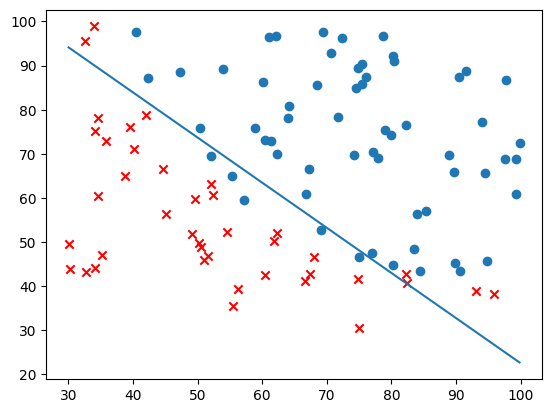

In [92]:
# 接下来作出 决策边界
ax, fig = plt.subplots()
theta = result[0]
fig.scatter(is_adm.ExamA, is_adm.ExamB)
fig.scatter(no_adm.ExamA, no_adm.ExamB, c='r', marker='x')
px = np.linspace(data.ExamA.min(), data.ExamA.max(), 100)
fig.plot(px, (-theta[0]-theta[1]*px)/theta[2])
plt.show()

In [95]:
# 接下来是predict()函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [98]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


## 正则化逻辑回归
* 正则化是指为缓解过拟合现象提高泛化能力，通过加入一些参数项，尽可能减小系数达到简化模型地目的。例如在多项式中把高次项的系数减到很小以使曲线更光滑
* 这次实验将包含某构件的两类测试分数以及是否合格的信息, 请使用正则化的方式对数据进行处理

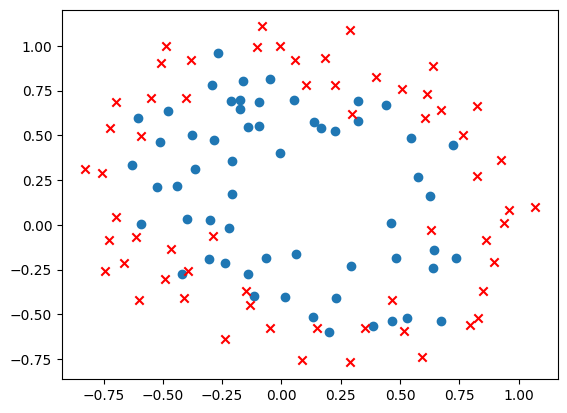

In [103]:
data2 = pd.read_csv('ex2data2.txt', header=None, names=['ScoreA', 'ScoreB', 'IsFine'])
good = data2[data2['IsFine']==1]
bad = data2[data2['IsFine']==0]
ax, fig = plt.subplots()
fig.scatter(good.ScoreA, good.ScoreB)
fig.scatter(bad.ScoreA, bad.ScoreB, c='r', marker='x')
plt.show()

In [104]:
# 十分显然变得复杂了